## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [5]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [6]:
# Display dataset information
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [8]:
# Replace zero values with NaN in the specified columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_with_zeros] = diabetes_data[columns_with_zeros].replace(0, np.nan)

# Display the updated dataset to confirm the changes
diabetes_data.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

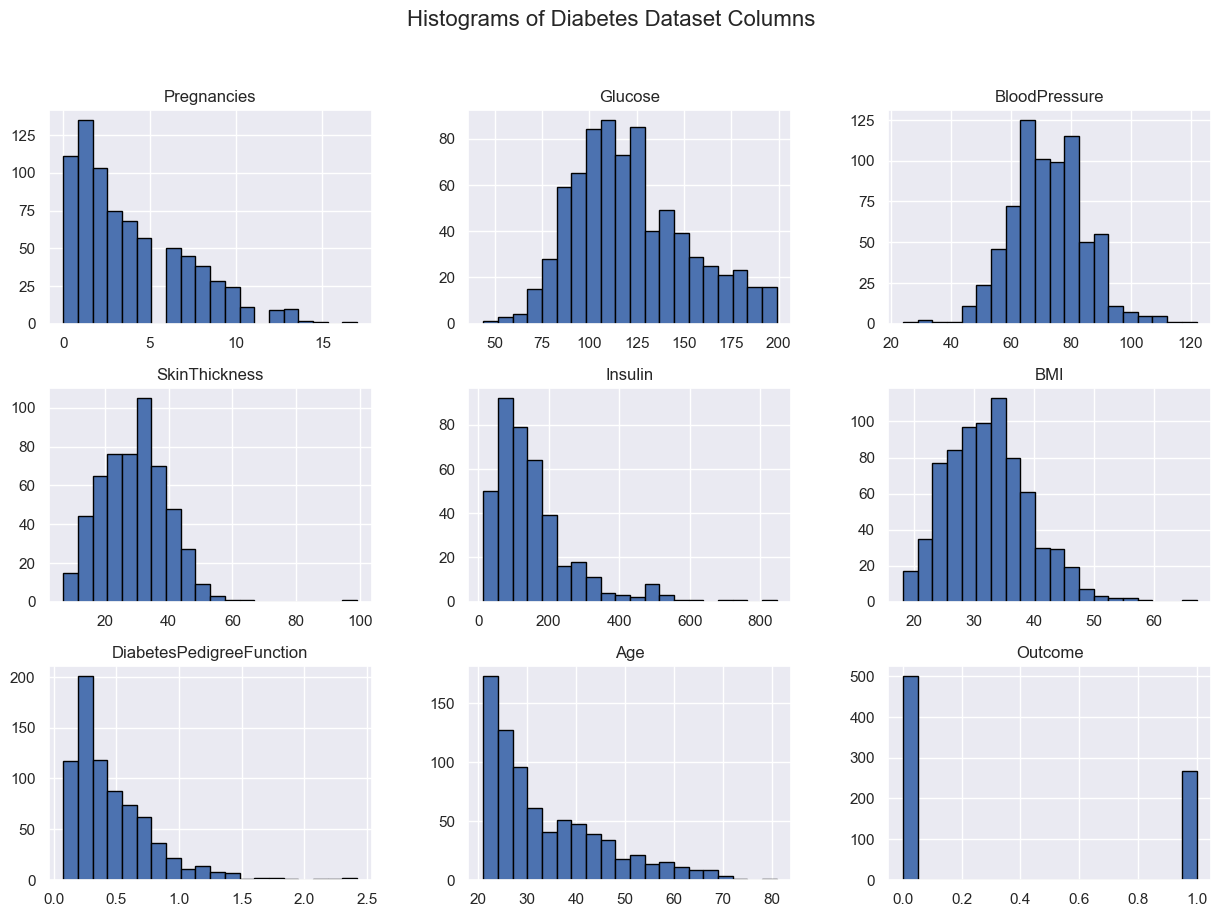

In [9]:

# Plot histograms for each column in the dataset
diabetes_data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Diabetes Dataset Columns', fontsize=16)
plt.show()


#### Replace the zeros with mean and median values.

In [10]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

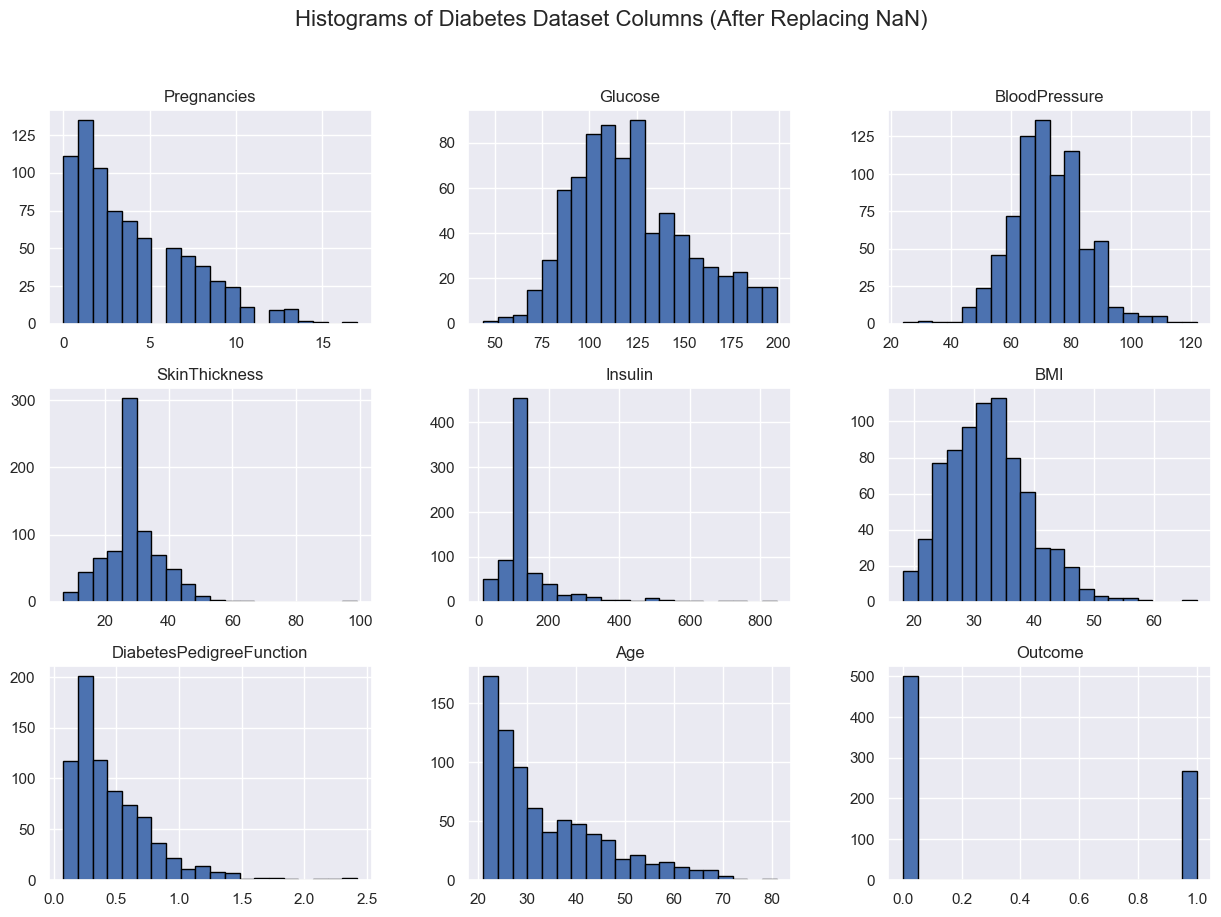

In [11]:
# Replace NaN with column means for plotting purposes
diabetes_data_filled = diabetes_data.fillna(diabetes_data.mean())

# Plot histograms for each column in the dataset after handling NaN
diabetes_data_filled.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Diabetes Dataset Columns (After Replacing NaN)', fontsize=16)
plt.show()


#### Plot the correlation matrix heatmap

Correlation between various features


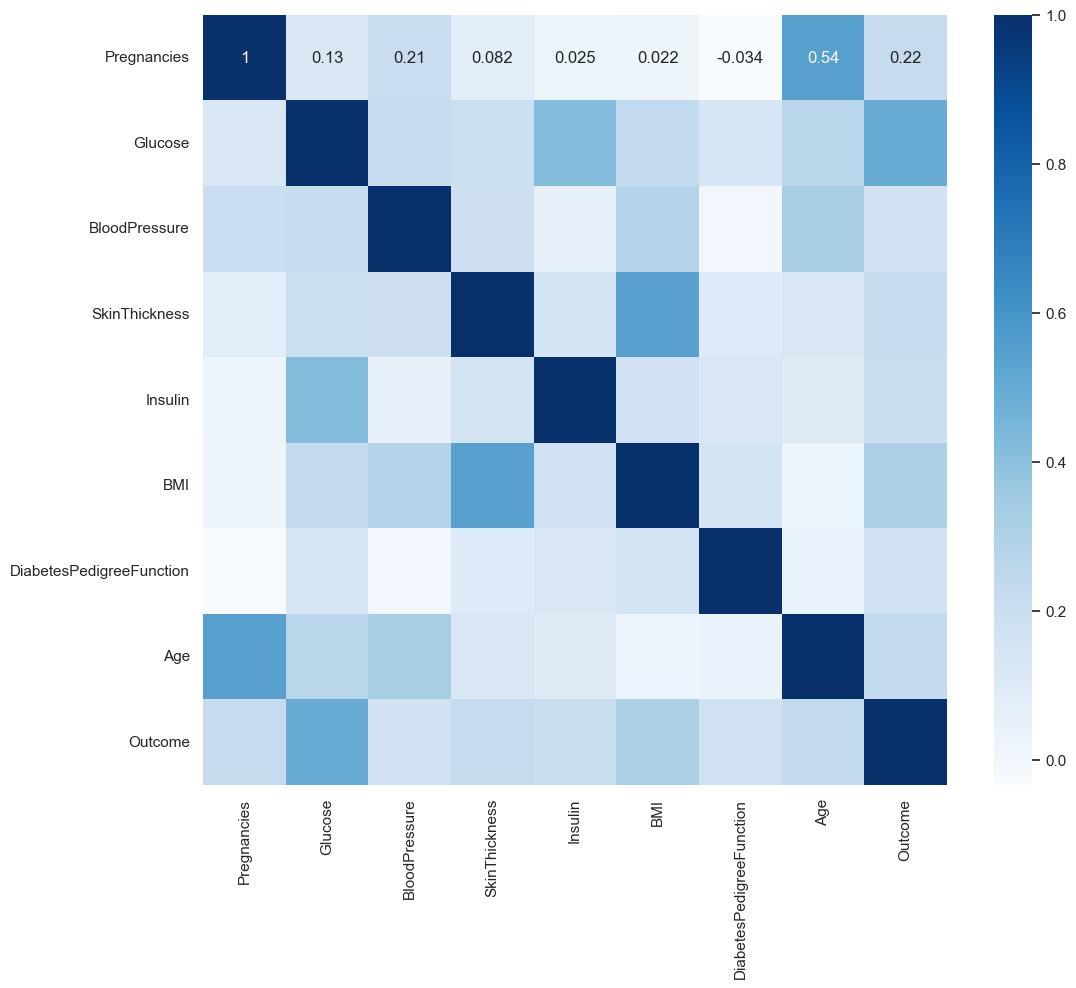

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
# Define the target variable 'y' as the 'Outcome' column
y = diabetes_data['Outcome']

# Display the first few values of y
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) as all columns except 'Outcome'
X = diabetes_data.drop(columns=['Outcome'])

# Perform a 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((537, 8), (231, 8), (537,), (231,))

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Confirm scaling by displaying a summary of scaled features
X_train_scaled[:5], X_test_scaled[:5]


(array([[-0.8362943 , -0.89610788, -1.00440048, -1.26954457, -0.956993  ,
         -1.20382556, -0.61421636, -0.94861028],
        [ 0.39072767, -0.56399695, -0.02026586,  0.02969309,  2.13679743,
          0.66449801, -0.90973787, -0.43466673],
        [-1.14304979,  0.43233584, -0.34831073,  1.56515578,  1.26775517,
          1.44057087, -0.30699103, -0.77729576],
        [ 0.08397217,  0.29949146, -0.34831073, -0.91520703,  0.29442785,
          0.11837266, -0.90681191, -0.43466673],
        [-0.8362943 , -0.63041914, -3.46473705,  1.09270572, -0.66731225,
          1.58428807, -0.83951493, -0.00638043]]),
 array([[ 0.69748316, -0.79647461, -1.16842292,  0.50214315,  0.57252137,
          0.24771813, -0.11680393,  0.85019217],
        [-0.52953881, -0.3315193 ,  0.2257678 ,  0.38403063, -0.18064858,
          0.49203737, -0.94192338, -1.03426754],
        [-0.52953881, -0.46436368, -0.67635561,  0.02969309, -0.18064858,
         -0.2121769 , -0.91266382, -1.03426754],
        [ 1.31

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [17]:
# Print the train and test scores from the stored variables
for i, (train_score, test_score) in enumerate(zip(train_scores, test_scores), start=1):
    print(f"k={i}: Train Score={train_score:.4f}, Test Score={test_score:.4f}")


k=1: Train Score=1.0000, Test Score=0.6840
k=2: Train Score=0.8454, Test Score=0.7056
k=3: Train Score=0.8399, Test Score=0.6926
k=4: Train Score=0.8212, Test Score=0.7100
k=5: Train Score=0.8212, Test Score=0.6710
k=6: Train Score=0.8212, Test Score=0.7013
k=7: Train Score=0.8119, Test Score=0.6970
k=8: Train Score=0.8045, Test Score=0.6970
k=9: Train Score=0.7952, Test Score=0.7100


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [18]:
# Identify the number of neighbors with the maximum training score
max_train_score = max(train_scores)
optimal_k_train = train_scores.index(max_train_score) + 1  

print(f"The number of neighbors (k) with the maximum training score is {optimal_k_train}, with a score of {max_train_score:.4f}.")


The number of neighbors (k) with the maximum training score is 1, with a score of 1.0000.


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [19]:
# Identify the number of neighbors with the maximum testing score
max_test_score = max(test_scores)
optimal_k_test = test_scores.index(max_test_score) + 1  

print(f"The number of neighbors (k) with the maximum testing score is {optimal_k_test}, with a score of {max_test_score:.4f}.")


The number of neighbors (k) with the maximum testing score is 4, with a score of 0.7100.


Plot the train and test model performance by number of neighbors.

C:\Users\mercy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mercy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mercy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mercy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

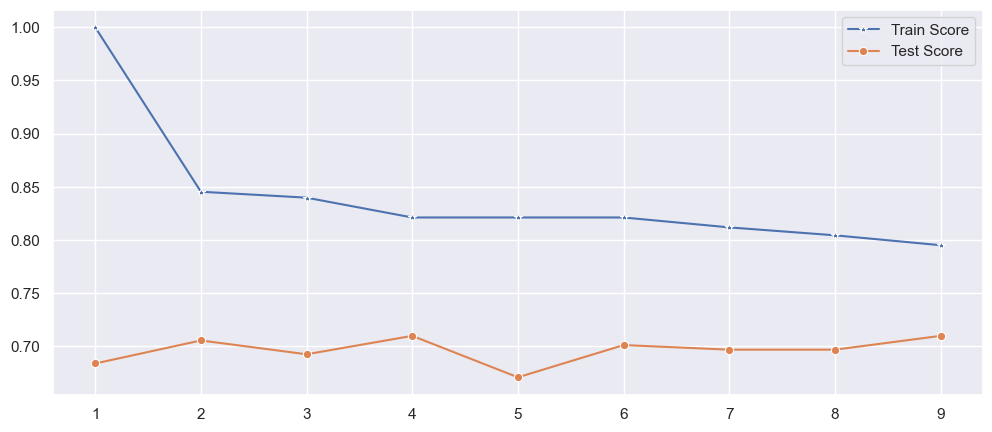

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
# Determine the best number of neighbors (k) based on the maximum test score
optimal_k = test_scores.index(max(test_scores)) + 1  # Adding 1 because k starts from 1

# Fit and score the model using the optimal number of neighbors
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train_scaled, y_train)

# Score the model
train_score = best_knn.score(X_train_scaled, y_train)
test_score = best_knn.score(X_test_scaled, y_test)

# Display results
print(f"The best number of neighbors (k) is {optimal_k}.")
print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")


The best number of neighbors (k) is 4.
Train Score: 0.8417
Test Score: 0.6926


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

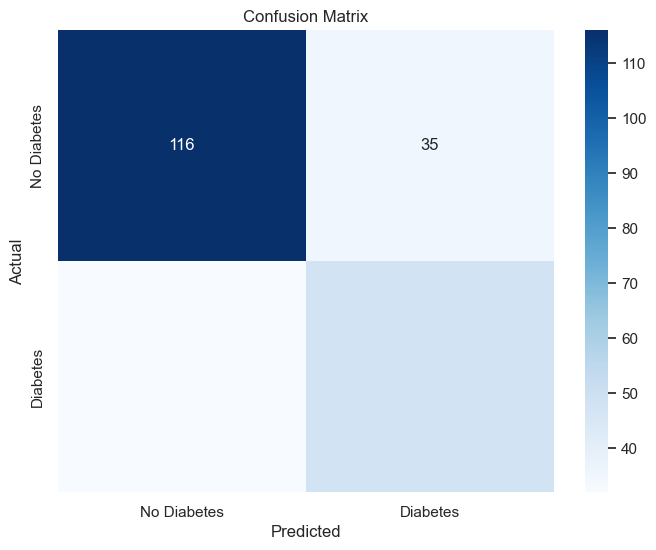

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pl, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**<font color='teal'> Print the classification report </font>**

In [24]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])

# Print the classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.77      0.78       151
    Diabetes       0.58      0.60      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [26]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the number of estimators
param_grid_rf = {'n_estimators': [10, 50, 100, 200, 300, 400, 500]}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object with 5-fold cross-validation
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

In [ ]:
# Fit the grid search on the training data
rf_cv.fit(X_train_scaled, y_train)

# Display the best parameters and corresponding score
best_n_estimators = rf_cv.best_params_['n_estimators']
best_rf_score = rf_cv.best_score_

print(f"The best number of estimators is {best_n_estimators}, with a cross-validated accuracy score of {best_rf_score:.4f}.")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
